![imagen](../../images/ejercicios.png)

# Ejercicio 1 

Importa los datos alojados en `../data/Current_Employee_Names__Salaries__and_Position_Titles.csv` y revisa cuantos valores nulos tiene el dataframe.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../../../data/Current_Employee_Names__Salaries__and_Position_Titles.csv')

df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [3]:
null=df.isna().sum()      

null[null>0]

Typical Hours    25161
Annual Salary     8022
Hourly Rate      25161
dtype: int64

# Ejercicio 2

¿Cuantas personas cobran un salario fijo y cuantas cobran por hora?. ¿Cuantas posiciones laborales hay?

In [4]:
df.groupby(['Salary or Hourly'])['Name'].count()

Salary or Hourly
Hourly     8022
Salary    25161
Name: Name, dtype: int64

In [5]:
df.groupby(['Department'])['Name'].count()

Department
ADMIN HEARNG                39
ANIMAL CONTRL               81
AVIATION                  1629
BOARD OF ELECTION          107
BOARD OF ETHICS              8
BUDGET & MGMT               46
BUILDINGS                  269
BUSINESS AFFAIRS           171
CITY CLERK                  84
CITY COUNCIL               411
COMMUNITY DEVELOPMENT      207
COPA                       116
CULTURAL AFFAIRS            65
DISABILITIES                28
DoIT                        99
FAMILY & SUPPORT           615
FINANCE                    560
FIRE                      4641
GENERAL SERVICES           980
HEALTH                     488
HUMAN RELATIONS             16
HUMAN RESOURCES             79
INSPECTOR GEN               87
LAW                        407
LICENSE APPL COMM            1
MAYOR'S OFFICE              85
OEMC                      2102
POLICE                   13414
POLICE BOARD                 2
PROCUREMENT                 92
PUBLIC LIBRARY            1015
STREETS & SAN             21

# Ejercicio 3

Nos gustaría saber si el sueldo para las personas que cobran por horas es significativamente mayor que 30$/hr. Realiza el testeo de hipotesis correspondiente y comentalo.

In [6]:
from scipy.stats import ttest_1samp

In [7]:
ttest_1samp(df['Hourly Rate'].dropna().tolist(), 30, alternative='greater')

# para alfa=0.05, podemos rechazar H0 y decir que es significativamente mayor

Ttest_1sampResult(statistic=20.6198057854942, pvalue=2.1615120243114947e-92)

In [8]:
df['Hourly Rate'].dropna().mean()

32.78855771628024

In [9]:
df['Hourly Rate'].dropna().std()

12.112572684276799

# Ejercicio 4

Para las personas que cobran anualmente, ¿el sueldo es significativamente menor que 85000$?

In [10]:
ttest_1samp(df['Annual Salary'].dropna(), 85000, alternative='less')

# no se puede rechazar H0, no es menor que 85000

Ttest_1sampResult(statistic=13.471462761756412, pvalue=1.0)

In [11]:
df['Annual Salary'].dropna().mean()

86786.99979015143

In [12]:
df['Annual Salary'].dropna().std()

21041.35460162839

/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


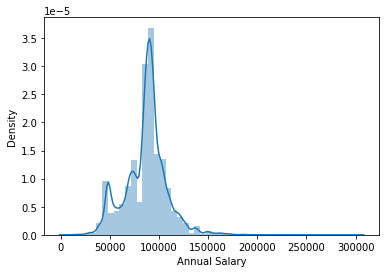

In [15]:
import seaborn as sns

sns.distplot(df['Annual Salary'].dropna());

# Ejercicio 5

El jefe de policia nos dice que su gente cobra de media 86000$. Realiza el test de hipotesis de dos colas.

In [19]:
ttest_1samp(df.loc[df.Department=='POLICE']['Annual Salary'].dropna(), 
            86000,
            alternative='two-sided').pvalue

# podemos rechazar H0

0.0020603403550965137

In [20]:
df.loc[df.Department=='POLICE']['Annual Salary'].dropna().mean()

86486.41450313339

In [21]:
df.loc[df.Department=='POLICE']['Annual Salary'].dropna().std()

18272.22829399308

/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


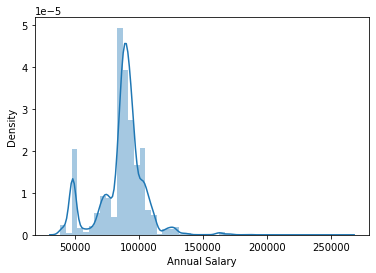

In [22]:
sns.distplot(df.loc[df.Department=='POLICE']['Annual Salary'].dropna());

# Ejercicio 6

El departamento con mas personas cobrando por hora se queja de que su sueldo es menor que 35$/hr. ¿Es eso cierto?

In [25]:
maximum_h_s=pd.crosstab(df.Department, df['Salary or Hourly'])

maximum_h_s.loc[maximum_h_s.Hourly==max(maximum_h_s.Hourly)]

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336


In [26]:
ttest_1samp(df.loc[df.Department=='STREETS & SAN']['Hourly Rate'].dropna(), 
            35, alternative='less').pvalue

# podemos rechazar H0

1.6689265282353859e-21

# Ejercicio 7

Para intervalos de confianza con el t-test, se usa la funcion [t.interval](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html). Calcula el intervalo de confianza del 95% para la media de sueldo por hora.


In [39]:
from scipy.stats import t, sem

In [40]:
sample=df[(df['Salary or Hourly']=='Hourly')]['Hourly Rate']

t.interval(0.95, len(sample)-1, loc=sample.mean(), scale=sample.std())

(9.04476857882128, 56.5323468537392)

In [41]:
sample.mean()

32.78855771628024

In [42]:
sem(sample)  # error standard

0.1352368565101596

In [43]:
sample.std()/(len(sample)**0.5)

0.1352368565101596

In [44]:
sample.std()

12.112572684276799

# Ejercicio 8

Construye el intervalo de confianza del 95% para el salario de la policia.

In [46]:
sample=df[(df['Salary or Hourly']=='Salary')&(df.Department=='POLICE')]['Annual Salary']

t.interval(0.95, len(sample)-1, loc=sample.mean(), scale=sem(sample))  # t.interval(confianza, dof, loc=media, scale=std)

(86177.05631531784, 86795.77269094894)

# Ejercicio 9

¿El numero de personas que trabajan por hora es significativamente diferente del 25% de personas? Realiza un test de proporcion con `proportions_ztest`.

In [47]:
from statsmodels.stats.proportion import proportions_ztest

In [48]:
df['Salary or Hourly'].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

In [49]:
proportions_ztest(df['Salary or Hourly'].value_counts()[1], len(df), 0.25)  # estadistico , pvalor

# se rechaza H0

(-3.5099964213703005, 0.0004481127249057967)

In [50]:
8022/(25161+8022)

0.24175029382515142

# Ejercicio 10

**AB-Test**


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `../data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [51]:
# librerias

import numpy as np
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm
import pylab as plt

In [52]:
# datos

data=pd.read_csv('../../../data/cookie_cats.csv')

data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [53]:
# transformacion

data.version=np.where(data.version=='gate_30', 'A', 'B')

data.retention_1=np.where(data.retention_1==True, 1, 0)
data.retention_7=np.where(data.retention_7==True, 1, 0)

data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,0,0
1,337,A,38,1,0
2,377,B,165,1,0
3,483,B,1,0,0
4,488,B,179,1,1


In [54]:
# muestreo

len(data[data.version=='A'])

44700

In [55]:
len(data[data.version=='B'])

45489

In [56]:
control=data[data.version=='A'].sample(n=44000, random_state=42)

tratamiento=data[data.version=='B'].sample(n=44000, random_state=42)

ab_test=pd.concat([control, tratamiento], axis=0)

ab_test.reset_index(drop=True, inplace=True)

ab_test.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,6531033,A,35,0,0
1,8003009,A,4,0,0
2,5566807,A,23,1,0
3,64235,A,1,0,0
4,6210551,A,7,0,0


In [57]:
ab_test.version.value_counts()

A    44000
B    44000
Name: version, dtype: int64

In [58]:
# testeo para retention_1

control_res=ab_test[ab_test.version=='A']['retention_1']
tratamiento_res=ab_test[ab_test.version=='B']['retention_1']

n_con=control_res.count()        # cuenta de elementos por grupo, ie, conversiones
n_trat=tratamiento_res.count()

conversiones=[control_res.sum(), tratamiento_res.sum()]  # conversiones por grupo

observaciones=[n_con, n_trat]   # cuenta N por grupo

z_score, p_value = proportions_ztest(conversiones, nobs=observaciones) # ztest y pvalor

#intervalos de confianza 95%
(control_a, tratamiento_a), (control_b, tratamiento_b) = proportion_confint(conversiones, nobs=observaciones, alpha=0.05)

print(f'z-score: {z_score:.2f}')
print(f'p-valor: {p_value:.3f}')
print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')
print(f'intervalo conf 95% para grupo tratamiento: [{tratamiento_a:.3f}, {tratamiento_b:.3f}]')

z-score: 1.68
p-valor: 0.093
intervalo conf 95% para grupo control: [0.444, 0.453]
intervalo conf 95% para grupo tratamiento: [0.438, 0.447]


In [59]:
ab_test.groupby('version').retention_1.mean(), ab_test.groupby('version').retention_1.std()

(version
 A    0.448432
 B    0.442795
 Name: retention_1, dtype: float64,
 version
 A    0.497339
 B    0.496723
 Name: retention_1, dtype: float64)

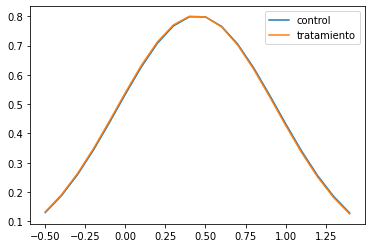

In [60]:
tasas_conversion=ab_test.groupby('version')['retention_1']

std=lambda x: np.std(x, ddof=0)                      # std
error_std= lambda x: sem(x, ddof=0)            # error estandar (std / sqrt(n))

tasas_conversion=tasas_conversion.agg([np.mean, std, error_std])
tasas_conversion.columns=['conversion_rate', 'std_deviation', 'std_error']


tasas_conversion.style.format('{:.3f}')

x=[i*.1 for i in range(-5, 15)]  

control=[norm.pdf(x, tasas_conversion.iloc[0][0], tasas_conversion.iloc[0][1]) for x in x] 

tratamiento=[norm.pdf(x, tasas_conversion.iloc[1][0], tasas_conversion.iloc[1][1]) for x in x] 

plt.plot(x, control)
plt.plot(x, tratamiento)
plt.legend(['control', 'tratamiento']);

In [61]:
# testeo para retention_7

control_res=ab_test[ab_test.version=='A']['retention_7']
tratamiento_res=ab_test[ab_test.version=='B']['retention_7']

n_con=control_res.count()        # cuenta de elementos por grupo, ie, conversiones
n_trat=tratamiento_res.count()

conversiones=[control_res.sum(), tratamiento_res.sum()]  # conversiones por grupo

observaciones=[n_con, n_trat]   # cuenta N por grupo

z_score, p_value = proportions_ztest(conversiones, nobs=observaciones) # ztest y pvalor

#intervalos de confianza 95%
(control_a, tratamiento_a), (control_b, tratamiento_b) = proportion_confint(conversiones, nobs=observaciones, alpha=0.05)

print(f'z-score: {z_score:.2f}')
print(f'p-valor: {p_value:.3f}')
print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')
print(f'intervalo conf 95% para grupo tratamiento: [{tratamiento_a:.3f}, {tratamiento_b:.3f}]')

z-score: 3.01
p-valor: 0.003
intervalo conf 95% para grupo control: [0.186, 0.194]
intervalo conf 95% para grupo tratamiento: [0.179, 0.186]


In [62]:
ab_test.groupby('version').retention_7.mean(), ab_test.groupby('version').retention_7.std()

(version
 A    0.190114
 B    0.182205
 Name: retention_7, dtype: float64,
 version
 A    0.392395
 B    0.386017
 Name: retention_7, dtype: float64)

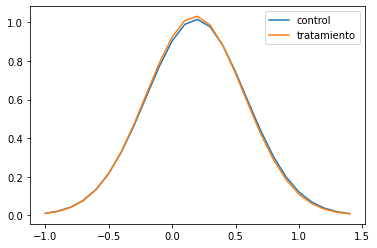

In [63]:
tasas_conversion=ab_test.groupby('version')['retention_7']

std=lambda x: np.std(x, ddof=0)                      # std
error_std= lambda x: sem(x, ddof=0)            # error estandar (std / sqrt(n))

tasas_conversion=tasas_conversion.agg([np.mean, std, error_std])
tasas_conversion.columns=['conversion_rate', 'std_deviation', 'std_error']


tasas_conversion.style.format('{:.3f}')

x=[i*.1 for i in range(-10, 15)]  

control=[norm.pdf(x, tasas_conversion.iloc[0][0], tasas_conversion.iloc[0][1]) for x in x] 

tratamiento=[norm.pdf(x, tasas_conversion.iloc[1][0], tasas_conversion.iloc[1][1]) for x in x] 

plt.plot(x, control)
plt.plot(x, tratamiento)
plt.legend(['control', 'tratamiento']);

In [64]:
# https://www.kaggle.com/ekrembayar/a-b-testing-step-by-step-hypothesis-testing/notebook